# Loading datasets and cleaning

In [42]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Patient.csv')

# Remove duplicates based on the PatientID column
df_cleaned = df.drop_duplicates(subset=['PatientID'])

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('Patient_cleaned.csv', index=False)

print("Duplicates removed and cleaned data saved to 'Patient_cleaned.csv'.")

Duplicates removed and cleaned data saved to 'Patient_cleaned.csv'.


In [43]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Doctor.csv')

# Remove duplicates based on the PatientID column
df_cleaned = df.drop_duplicates(subset=['DoctorID'])

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('Doctor_cleaned.csv', index=False)

print("Duplicates removed and cleaned data saved to 'Doctor_cleaned.csv'.")

Duplicates removed and cleaned data saved to 'Doctor_cleaned.csv'.


In [44]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Appointment.csv')

# Remove duplicates based on the PatientID column
df_cleaned = df.drop_duplicates(subset=['AppointmentID'])

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('Appointment_cleaned.csv', index=False)

print("Duplicates removed and cleaned data saved to 'Appointment_cleaned.csv'.")

Duplicates removed and cleaned data saved to 'Appointment_cleaned.csv'.


In [45]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Medical Procedure.csv')

# Remove duplicates based on the PatientID column
df_cleaned = df.drop_duplicates(subset=['ProcedureID'])

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('Procedure_cleaned.csv', index=False)

print("Duplicates removed and cleaned data saved to 'Procedure_cleaned.csv'.")

Duplicates removed and cleaned data saved to 'Procedure_cleaned.csv'.


In [46]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('Billing.csv')

# Remove duplicates based on the PatientID column
df_cleaned = df.drop_duplicates(subset=['InvoiceID'])

# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('Billing_cleaned.csv', index=False)

print("Duplicates removed and cleaned data saved to 'Billing_cleaned.csv'.")

Duplicates removed and cleaned data saved to 'Billing_cleaned.csv'.


In [47]:
import sqlite3

# Connect to SQLite database
with sqlite3.connect('healthcare.db') as conn:
    cursor = conn.cursor()

    # Drop existing tables (if they exist)
    cursor.execute('DROP TABLE IF EXISTS Patients')
    cursor.execute('DROP TABLE IF EXISTS Doctors')
    cursor.execute('DROP TABLE IF EXISTS Appointments')
    cursor.execute('DROP TABLE IF EXISTS MedicalProcedure')
    cursor.execute('DROP TABLE IF EXISTS Billing')

    # Create Patients table
    cursor.execute('''
        CREATE TABLE Patients (
            PatientID INTEGER PRIMARY KEY,
            firstname TEXT,
            lastname TEXT,
            email TEXT
        )
    ''')

    # Create Doctors table
    cursor.execute('''
        CREATE TABLE Doctors (
            DoctorID INTEGER PRIMARY KEY,
            DoctorName TEXT,
            Specialization TEXT,
            DoctorContact TEXT
        )
    ''')

    # Create Appointments table
    cursor.execute('''
        CREATE TABLE Appointments (
            AppointmentID INTEGER PRIMARY KEY,
            Date TEXT,
            Time TEXT,
            PatientID INTEGER,
            DoctorID INTEGER,
            FOREIGN KEY (PatientID) REFERENCES Patients(PatientID),
            FOREIGN KEY (DoctorID) REFERENCES Doctors(DoctorID)
        )
    ''')

    # Create MedicalProcedure table
    cursor.execute('''
        CREATE TABLE MedicalProcedure (
            ProcedureID INTEGER PRIMARY KEY,
            ProcedureName TEXT,
            AppointmentID INTEGER,
            FOREIGN KEY (AppointmentID) REFERENCES Appointments(AppointmentID)
        )
    ''')

    # Create Billing table
    cursor.execute('''
        CREATE TABLE Billing (
            InvoiceID TEXT PRIMARY KEY,
            PatientID INTEGER,
            Items TEXT,
            Amount REAL,
            FOREIGN KEY (PatientID) REFERENCES Patients(PatientID)
        )
    ''')

print("SQLite database 'healthcare.db' created successfully.")


SQLite database 'healthcare.db' created successfully.


In [48]:
import sqlite3
import csv

# Connect to SQLite database
conn = sqlite3.connect('healthcare.db')
cursor = conn.cursor()

# Function to insert data from CSV into SQLite table
def insert_data_from_csv(csv_file, table_name):
    with open(csv_file, 'r', newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header row if present
        for row in reader:
            cursor.execute(f'INSERT INTO {table_name} VALUES ({", ".join("?" * len(row))})', row)

# Insert data into Patients table from CSV
insert_data_from_csv('Patient_cleaned.csv', 'Patients')

# Insert data into Doctors table from CSV
insert_data_from_csv('Doctor_cleaned.csv', 'Doctors')

# Insert data into Appointments table from CSV
insert_data_from_csv('Appointment_cleaned.csv', 'Appointments')

# Insert data into MedicalProcedure table from CSV
insert_data_from_csv('Procedure_cleaned.csv', 'MedicalProcedure')

# Insert data into Billing table from CSV
insert_data_from_csv('Billing_cleaned.csv', 'Billing')

# Commit changes and close connection
conn.commit()

print("Data inserted into SQLite database successfully.")


Data inserted into SQLite database successfully.


# Data Insights

In [49]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('healthcare.db')

# Example: Retrieve all patients along with their appointments and doctor information
query = '''
    SELECT p.PatientID, p.firstname, p.lastname, a.Date, a.Time, d.DoctorName, d.Specialization
    FROM Patients p
    INNER JOIN Appointments a ON p.PatientID = a.PatientID
    INNER JOIN Doctors d ON a.DoctorID = d.DoctorID
'''

# Execute query and fetch results into a DataFrame
df = pd.read_sql_query(query, conn)



# Display the retrieved data
print(df.head())





   PatientID firstname  lastname        Date                      Time  \
0        305     Grier  Ummersen  2021-12-29  2023-12-23T14:33:46.410Z   
1        214     Janey  Bearnard  2023-10-08  2023-12-23T14:33:46.412Z   
2        867      Doro  Johnsson  2021-12-11  2023-12-23T14:33:46.412Z   
3        589     Elena   Richers  2022-03-29  2023-12-23T14:33:46.411Z   
4        190     Amara  Sawtelle  2020-07-12  2023-12-23T14:33:46.414Z   

  DoctorName      Specialization  
0      Sissy   Otolaryngologists  
1    Brianna         Dermatology  
2      Moyna  Infectious disease  
3      Ricky  Infectious disease  
4      Joane           Neurology  


In [50]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('healthcare.db')

# Query to summarize patient demographics
query_demographics = '''
    SELECT
        COUNT(*) AS TotalPatients,
        SUM(CASE WHEN firstname IS NULL OR lastname IS NULL OR email IS NULL THEN 1 ELSE 0 END) AS MissingInfo,
        COUNT(DISTINCT PatientID) AS UniquePatients,
        COUNT(DISTINCT firstname) AS UniqueFirstNames,
        COUNT(DISTINCT lastname) AS UniqueLastNames
    FROM Patients
'''

# Execute query and fetch data into DataFrame
df_demographics = pd.read_sql_query(query_demographics, conn)

# Close connection
conn.close()

# Display results
print("Summary of Patient Demographics:")
print(df_demographics)


Summary of Patient Demographics:
   TotalPatients  MissingInfo  UniquePatients  UniqueFirstNames  \
0            601            0             601               398   

   UniqueLastNames  
0              462  


In [51]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('healthcare.db')

# Query to summarize appointment scheduling patterns
query_scheduling_patterns = '''
    SELECT
        COUNT(*) AS TotalAppointments,
        COUNT(DISTINCT AppointmentID) AS UniqueAppointments,
        COUNT(DISTINCT PatientID) AS UniquePatients,
        COUNT(DISTINCT DoctorID) AS UniqueDoctors,
        strftime('%Y', Date) AS Year,
        strftime('%m', Date) AS Month,
        strftime('%d', Date) AS Day,
        strftime('%w', Date) AS DayOfWeek,
        Time
    FROM Appointments
    GROUP BY Year, Month, Day, DayOfWeek, Time
    ORDER BY Year, Month, Day, Time
'''

# Execute query and fetch data into DataFrame
df_scheduling_patterns = pd.read_sql_query(query_scheduling_patterns, conn)

# Close connection
conn.close()

# Display results
print("Summary of Appointment Scheduling Patterns:")
print(df_scheduling_patterns)


Summary of Appointment Scheduling Patterns:
     TotalAppointments  UniqueAppointments  UniquePatients  UniqueDoctors  \
0                    1                   1               1              1   
1                    1                   1               1              1   
2                    1                   1               1              1   
3                    1                   1               1              1   
4                    1                   1               1              1   
..                 ...                 ...             ...            ...   
580                  1                   1               1              1   
581                  1                   1               1              1   
582                  1                   1               1              1   
583                  1                   1               1              1   
584                  1                   1               1              1   

     Year Month Day DayOfWeek  

In [52]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('healthcare.db')

# Query to summarize billing insights
query_billing_insights = '''
    SELECT
        COUNT(*) AS TotalTransactions,
        SUM(Amount) AS TotalAmount,
        AVG(Amount) AS AverageAmount,
        MAX(Amount) AS MaxAmount,
        MIN(Amount) AS MinAmount,
        COUNT(DISTINCT InvoiceID) AS UniqueInvoices,
        COUNT(DISTINCT PatientID) AS UniquePatients,
        Items AS MostCommonItem
    FROM Billing
    GROUP BY MostCommonItem
    ORDER BY TotalAmount DESC
'''

# Execute query and fetch data into DataFrame
df_billing_insights = pd.read_sql_query(query_billing_insights, conn)

# Close connection
conn.close()

# Display results
print("Summary of Billing Insights:")
print(df_billing_insights)


Summary of Billing Insights:
    TotalTransactions  TotalAmount  AverageAmount  MaxAmount  MinAmount  \
0                  25   14083138.0  563325.520000   859275.0    49414.0   
1                  24   13123784.0  546824.333333   996843.0    68135.0   
2                  20   12202715.0  610135.750000   990073.0   145410.0   
3                  22   10533773.0  478807.863636   902884.0    20564.0   
4                  17   10296095.0  605652.647059   977858.0    26117.0   
..                ...          ...            ...        ...        ...   
63                 11    3792139.0  344739.909091   781027.0    46847.0   
64                 10    3759598.0  375959.800000   923796.0    39971.0   
65                  9    3505813.0  389534.777778   809324.0    16114.0   
66                  9    2553902.0  283766.888889   801357.0    27009.0   
67                  8    2211512.0  276439.000000   998106.0    24611.0   

    UniqueInvoices  UniquePatients                            MostComm

In [53]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('healthcare.db')

# Query to summarize doctor availability
query_doctor_availability = '''
    SELECT
        Doctors.DoctorID,
        Doctors.DoctorName,
        Doctors.Specialization,
        Doctors.DoctorContact,
        COUNT(*) AS TotalAppointments
    FROM Doctors
    LEFT JOIN Appointments ON Doctors.DoctorID = Appointments.DoctorID
    GROUP BY Doctors.DoctorID, Doctors.DoctorName, Doctors.Specialization, Doctors.DoctorContact
    ORDER BY TotalAppointments DESC
'''

# Execute query and fetch data into DataFrame
df_doctor_availability = pd.read_sql_query(query_doctor_availability, conn)

# Close connection
conn.close()

# Display results
print("Summary of Doctor Availability:")
print(df_doctor_availability)


Summary of Doctor Availability:
     DoctorID DoctorName               Specialization  DoctorContact  \
0         170   Quintina                   Oncologist  .@yopmail.com   
1         117     Karena            Otolaryngologists  .@yopmail.com   
2         427     Jeanna  Obstetric Anesthesiologists  .@yopmail.com   
3         430    Eolanda                   Allergists  .@yopmail.com   
4         527  Cristabel                   Cardiology  .@yopmail.com   
..        ...        ...                          ...            ...   
595       994  Cristabel                   Oncologist  .@yopmail.com   
596       995      Lanae                    Neurology  .@yopmail.com   
597       997   Georgina  Obstetric Anesthesiologists  .@yopmail.com   
598       999      Wynne           Infectious disease  .@yopmail.com   
599      1000      Brana                   Nephrology  .@yopmail.com   

     TotalAppointments  
0                    4  
1                    3  
2                    3  
3  

# Visualization

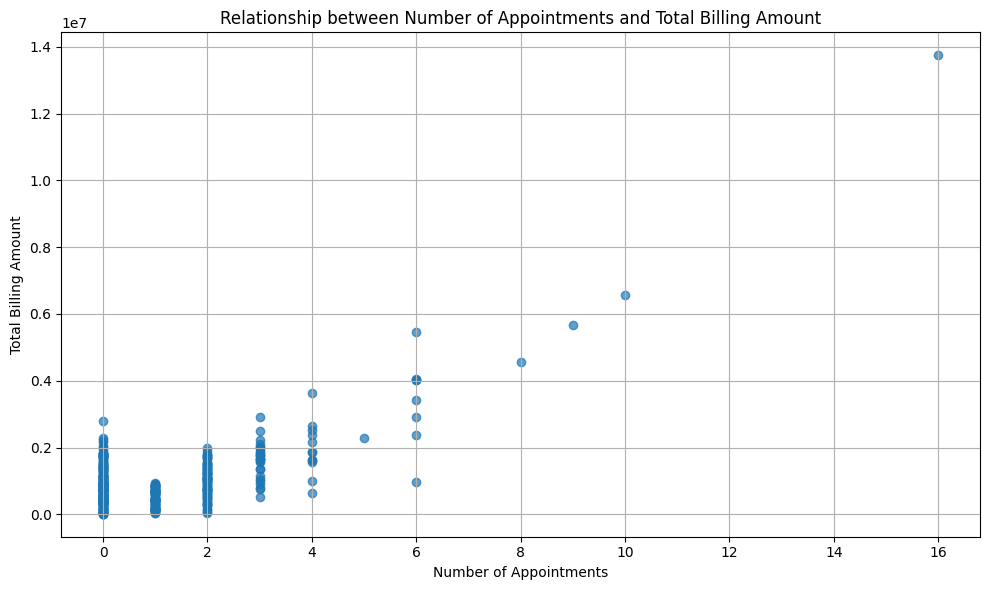

In [54]:
# Billing vs appointment

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('healthcare.db')

# Example SQL query to fetch data for scatter plot
query_billing_vs_appointments = '''
    SELECT
        p.PatientID,
        COUNT(a.AppointmentID) AS NumAppointments,
        SUM(b.Amount) AS TotalAmount
    FROM Patients p
    LEFT JOIN Appointments a ON p.PatientID = a.PatientID
    LEFT JOIN Billing b ON p.PatientID = b.PatientID
    GROUP BY p.PatientID
'''

# Execute query and fetch data into DataFrame
df_billing_vs_appointments = pd.read_sql_query(query_billing_vs_appointments, conn)

# Close connection
conn.close()

# Plotting using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df_billing_vs_appointments['NumAppointments'], df_billing_vs_appointments['TotalAmount'], alpha=0.7)
plt.title('Relationship between Number of Appointments and Total Billing Amount')
plt.xlabel('Number of Appointments')
plt.ylabel('Total Billing Amount')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


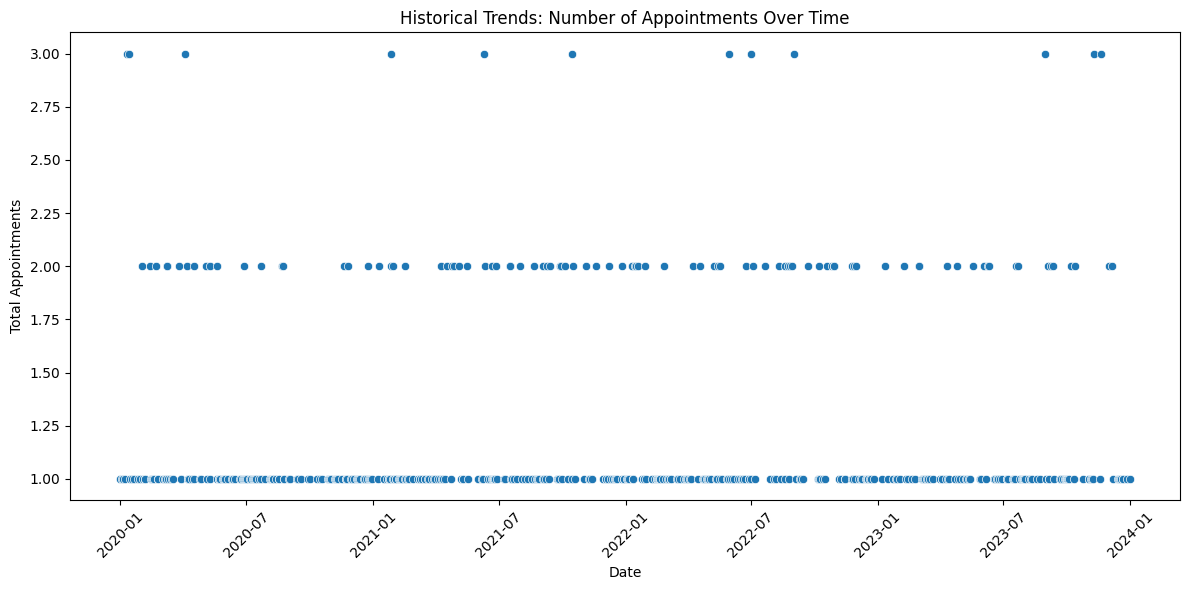

In [55]:
# Date vs no. of appointments
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect('healthcare.db')

# Query to fetch historical data (e.g., number of appointments per date)
query_appointments_trend = '''
    SELECT Date, COUNT(*) AS TotalAppointments
    FROM Appointments
    GROUP BY Date
    ORDER BY Date
'''

# Execute query and fetch data into DataFrame
df_appointments_trend = pd.read_sql_query(query_appointments_trend, conn)

# Close connection
conn.close()

# Convert 'Date' column to datetime type if it's not already
df_appointments_trend['Date'] = pd.to_datetime(df_appointments_trend['Date'])

# Plotting using seaborn scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Date', y='TotalAppointments', data=df_appointments_trend, marker='o')
plt.title('Historical Trends: Number of Appointments Over Time')
plt.xlabel('Date')
plt.ylabel('Total Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Predicting patient health outcomes

In [56]:
import sqlite3
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Connect to SQLite database
conn = sqlite3.connect('healthcare.db')

# Query the MedicalProcedure table
query = '''
    SELECT ProcedureID, ProcedureName
    FROM MedicalProcedure
'''
procedures_df = pd.read_sql_query(query, conn)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the TF-IDF vectorizer on procedure names
tfidf_matrix = tfidf_vectorizer.fit_transform(procedures_df['ProcedureName'])

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to recommend procedures based on similarity
def recommend_procedures(procedure_name, cosine_sim=cosine_sim, procedures_df=procedures_df, top_n=5):
    # Find index of procedure_name if it exists
    if procedure_name in procedures_df['ProcedureName'].values:
        idx = procedures_df.index[procedures_df['ProcedureName'] == procedure_name].tolist()[0]

        # Get pairwise similarity scores with all procedures
        sim_scores = list(enumerate(cosine_sim[idx]))

        # Sort procedures based on similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get top-n similar procedures
        top_sim_scores = sim_scores[1:top_n+1]  # Exclude self and take top-n

        # Get procedure indices
        procedure_indices = [i[0] for i in top_sim_scores]

        # Return top-n similar procedures
        return procedures_df.iloc[procedure_indices]
    else:
        print(f"No procedure found with name '{procedure_name}'.")
        return None

# Example usage: Recommend procedures similar to 'Knee Surgery'
recommendations = recommend_procedures('Kidney transplant')
if recommendations is not None:
    print(recommendations[['ProcedureID', 'ProcedureName']])


     ProcedureID      ProcedureName
146          273  Kidney transplant
181          328  Kidney transplant
201          360  Kidney transplant
247          432  Kidney transplant
291          503  Kidney transplant


In [57]:
# Accuracy
# Assuming you have a ground truth set of similar procedures for evaluation
ground_truth = {'Knee Surgery': ['Arthroscopic Knee Surgery', 'Knee Replacement', 'ACL Reconstruction']}

def evaluate_recommendations(ground_truth, top_n=5):
    total_queries = len(ground_truth)
    total_correct = 0
    total_retrieved = 0

    for query, similar_procedures in ground_truth.items():
        recommendations = recommend_procedures(query, top_n=top_n)
        if recommendations is not None:
            retrieved_procedures = list(recommendations['ProcedureName'])
            total_retrieved += len(retrieved_procedures)
            correct_predictions = set(retrieved_procedures) & set(similar_procedures)
            total_correct += len(correct_predictions)

    precision = total_correct / total_retrieved if total_retrieved > 0 else 0
    recall = total_correct / total_queries if total_queries > 0 else 0

    print(f"Precision@{top_n}: {precision:.2f}")
    print(f"Recall@{top_n}: {recall:.2f}")

# Evaluate precision and recall for top-5 recommendations
evaluate_recommendations(ground_truth)


No procedure found with name 'Knee Surgery'.
Precision@5: 0.00
Recall@5: 0.00


In [58]:
pip install streamlit

In [59]:
# Save the model as a pickle file
import pickle
with open('healthcare.pkl', 'wb') as f:
    pickle.dump((tfidf_vectorizer, cosine_sim, procedures_df), f)

print("Model saved as procedure_recommender.pkl")

Model saved as procedure_recommender.pkl


In [60]:
# Load the pickled objects
pickle_file = 'healthcare.pkl'
with open(pickle_file, 'rb') as f:
    tfidf_vectorizer, cosine_sim, procedures_df = pickle.load(f)

print("Loaded the model components from procedure_recommender.pkl")

Loaded the model components from procedure_recommender.pkl


In [41]:
import streamlit as st
import pandas as pd

def recommend_procedures(procedure_name, cosine_sim=cosine_sim, procedures_df=procedures_df, top_n=5):
    if procedure_name in procedures_df['ProcedureName'].values:
        idx = procedures_df.index[procedures_df['ProcedureName'] == procedure_name].tolist()[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        top_sim_scores = sim_scores[1:top_n+1]
        procedure_indices = [i[0] for i in top_sim_scores]
        return procedures_df.iloc[procedure_indices]
    else:
        st.write(f"No procedure found with name '{procedure_name}'.")
        return None
# Streamlit app
st.title('Healthcare Management System')

procedure_name = st.text_input('Enter Procedure Name', '')

if st.button('Recommend'):
    if procedure_name:
        recommendations = recommend_procedures(procedure_name, cosine_sim, procedures_df)
        if recommendations is not None:
            st.write('Recommended Procedures:')
            st.table(recommendations[['ProcedureID', 'ProcedureName']])
        else:
            st.write(f"No procedure found with name '{procedure_name}'.")
    else:
        st.write("Please enter a procedure name.")

# To run the app, save this script as app.py and use the command `streamlit run app.py` in the terminal.

In [61]:
!pip install streamlit pyngrok

In [62]:
# %%writefile app.py
!pip install scikit-learn as sklearn
# import streamlit as st
# import pandas as pd
# import sqlite3
# import pickle

# # Load the pickled objects
# pickle_file = 'healthcare.pkl'
# with open(pickle_file, 'rb') as f:
#     tfidf_vectorizer, cosine_sim, procedures_df = pickle.load(f)

# def recommend_procedures(procedure_name, cosine_sim=cosine_sim, procedures_df=procedures_df, top_n=5):
#     if procedure_name in procedures_df['ProcedureName'].values:
#         idx = procedures_df.index[procedures_df['ProcedureName'] == procedure_name].tolist()[0]
#         sim_scores = list(enumerate(cosine_sim[idx]))
#         sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
#         top_sim_scores = sim_scores[1:top_n+1]
#         procedure_indices = [i[0] for i in top_sim_scores]
#         return procedures_df.iloc[procedure_indices]
#     else:
#         st.write(f"No procedure found with name '{procedure_name}'.")
#         return None

# st.title("Healthcare Management System")

# procedure_name = st.text_input("Enter a procedure name:", "Kidney transplant")
# if procedure_name:
#     recommendations = recommend_procedures(procedure_name)
#     if recommendations is not None:
#         st.write("Recommended procedures:")
#         st.write(recommendations[['ProcedureID', 'ProcedureName']])


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [39]:
# # Start the Streamlit app in the background
# !streamlit run healthcare.py &




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.231.246.255:8501

  Stopping...
